In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
data=pd.read_csv("train.csv",parse_dates=['Dates'],index_col='Dates')
data.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
data.isnull().sum()

Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [4]:
crime_rating=data['Category'].value_counts()
print(crime_rating)

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [5]:
districts=data['PdDistrict'].value_counts()
districts

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [6]:
crime_adress= data['Address'].unique()
print(crime_adress)

['OAK ST / LAGUNA ST' 'VANNESS AV / GREENWICH ST'
 '1500 Block of LOMBARD ST' ... '300 Block of JOHN F KENNEDY DR'
 'FOLSOM ST / ZENO PL' '1000 Block of 22ND AV']


san francisco total crime graph wiht respect to top crime categgory

Text(0.5,1,'San Francisco crime')

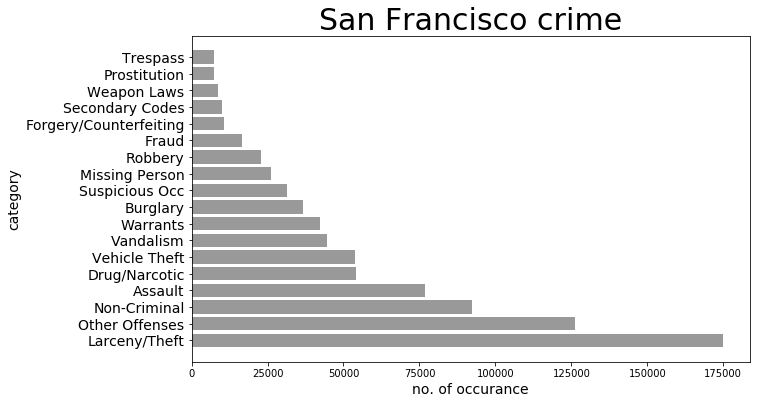

In [7]:
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

y_pos=np.arange(len(crime_rating[0:18].keys()))
plt.barh(y_pos,crime_rating[0:18].get_values(),align='center', alpha=0.4, color = 'black')
plt.yticks(y_pos, map(lambda x:x.title(),crime_rating[0:18].keys()), fontsize = 14)
plt.xlabel('no. of occurance',fontsize='14')
plt.ylabel('category',fontsize='14')
plt.title('San Francisco crime',fontsize='30')


	district		crime


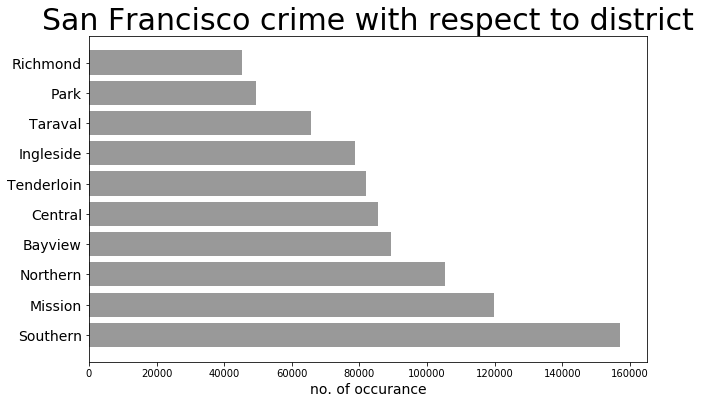

In [8]:
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

y_pos=np.arange(len(districts[0:10].keys()))
plt.barh(y_pos,districts[0:10].get_values(),align='center', alpha=0.4, color = 'black')
plt.yticks(y_pos, map(lambda x:x.title(),districts[0:10].keys()), fontsize = 14)
plt.xlabel('no. of occurance',fontsize='14')
plt.title('San Francisco crime with respect to district',fontsize='30')
print('\tdistrict\t\tcrime')

add new featurs like day ,hour,month year and day of weak

In [9]:
data['DayOfWeek'] = data.index.dayofweek
data['Hour'] = data.index.hour
data['Month'] = data.index.month
data['Year'] = data.index.year
data['DayOfMonth'] = data.index.day
data.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour,Month,Year,DayOfMonth
Dates,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015,13
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015,13
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015,13


graph of crime per hour

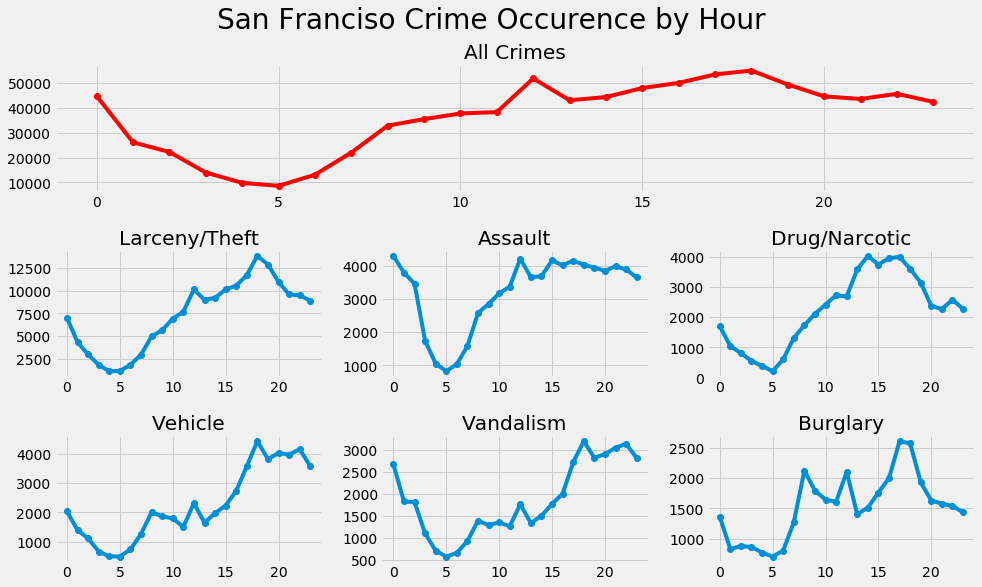

In [10]:
import pylab
pylab.rcParams['figure.figsize'] = (14.0, 8.0)

larceny = data[data['Category'] == "LARCENY/THEFT"]
assault = data[data['Category'] == "ASSAULT"]
drug = data[data['Category'] == "DRUG/NARCOTIC"]
vehicle = data[data['Category'] == "VEHICLE THEFT"]
vandalism = data[data['Category'] == "VANDALISM"]
burglary = data[data['Category'] == "BURGLARY"]

with plt.style.context('fivethirtyeight'):
    ax1=plt.subplot2grid((3,3),(0,0),colspan=3)
    ax1.plot(data.groupby('Hour').size(),'ro-')
    ax1.set_title('All Crimes')
    
    ax2=plt.subplot2grid((3,3),(1,0))
    ax2.plot(larceny.groupby('Hour').size(),'o-')
    ax2.set_title ('Larceny/Theft')
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(assault.groupby('Hour').size(), 'o-')
    ax3.set_title ('Assault')
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(drug.groupby('Hour').size(), 'o-')
    ax4.set_title ('Drug/Narcotic')
    
    ax5 = plt.subplot2grid((3,3), (2, 0))
    ax5.plot(vehicle.groupby('Hour').size(), 'o-')
    ax5.set_title ('Vehicle')
    
    ax6 = plt.subplot2grid((3,3), (2, 1))
    ax6.plot(vandalism.groupby('Hour').size(), 'o-')
    ax6.set_title ('Vandalism')
    
    ax7 = plt.subplot2grid((3,3), (2, 2))
    ax7.plot(burglary.groupby('Hour').size(), 'o-')
    ax7.set_title ('Burglary')
    
    pylab.gcf().text(0.5, 1.03, 
                    'San Franciso Crime Occurence by Hour',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
  
#it is used for tightly bound the title with graph
plt.tight_layout(2)
plt.show()

plotting of crime according to day 

[121584 124965 129211 125038 133734 126810 116707]


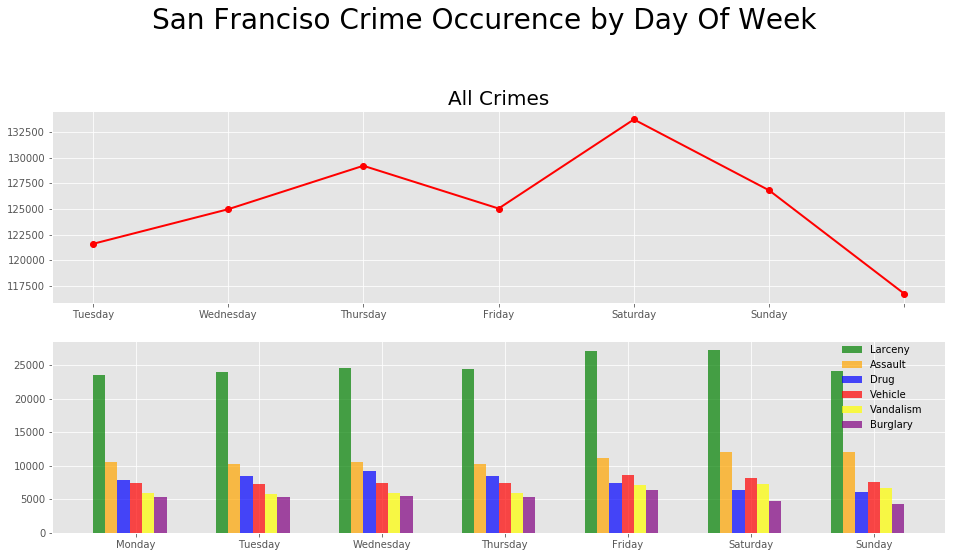

In [11]:
pylab.rcParams['figure.figsize'] = (16.0, 12.0)

plt.style.use('ggplot')

dayofweekid=data.groupby('DayOfWeek').size().keys()
daysOfWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
occursByWeek = data.groupby('DayOfWeek').size().get_values()
print(occursByWeek)

#plot for all crime by day
ax1=plt.subplot2grid((3,3),(0,0),colspan=3)
ax1.plot(dayofweekid,occursByWeek,'ro-',linewidth=2)
ax1.set_xticklabels(daysOfWeek)
ax1.set_title ('All Crimes', fontsize=20)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()


# Bar plot
y = np.empty([6,7])
h = [None]*6
width = 0.1

ax2 = plt.subplot2grid((3,3), (1,0), colspan=3)

y[0] = larceny.groupby('DayOfWeek').size().get_values()
y[1] = assault.groupby('DayOfWeek').size().get_values()
y[2] = drug.groupby('DayOfWeek').size().get_values()
y[3] = vehicle.groupby('DayOfWeek').size().get_values()
y[4] = vandalism.groupby('DayOfWeek').size().get_values()
y[5] = burglary.groupby('DayOfWeek').size().get_values()

color_sequence = ['green', 'orange', 'blue','red', 'yellow', 'purple']

for i in range(0,6):
    h[i] = ax2.bar(dayofweekid + i*width, y[i], width, color=color_sequence[i], alpha = 0.7)

ax2.set_xticks(dayofweekid + 3*width)
ax2.set_xticklabels(daysOfWeek)
# ensure that ticks are only at the bottom and left parts of the plot
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()

ax2.legend((item[0] for item in h), 
           ('Larceny', 'Assault', 'Drug', 'Vehicle', 'Vandalism', 'Burglary'), 
           bbox_to_anchor=(0.88, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'San Franciso Crime Occurence by Day Of Week',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)

plt.show()

crime by month

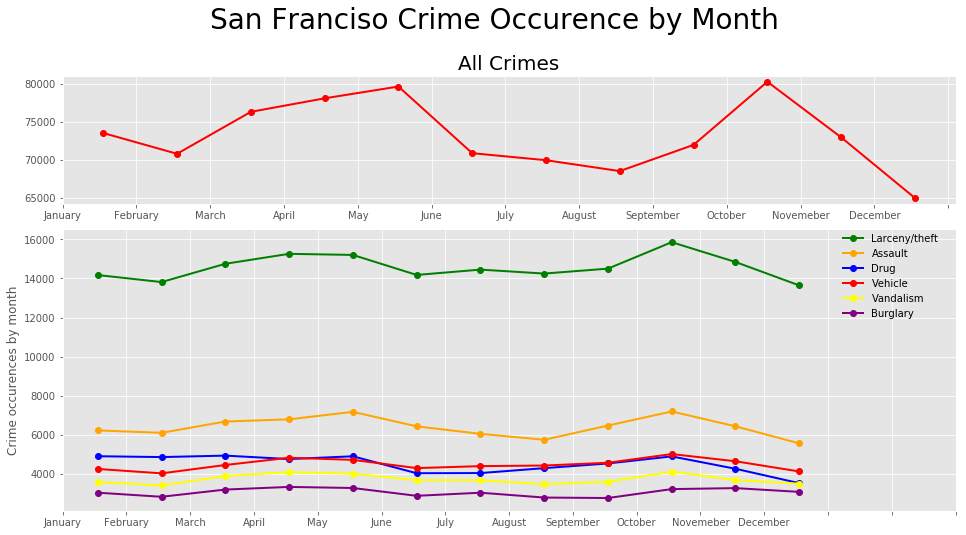

In [12]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

monthsid = data.groupby('Month').size().keys() - 1
monthslist = ['January', 'February', 
             'March', 'April', 'May', 
             'June', 'July','August', 
             'September', 'October', 'Novemeber', 'December']

occursbymonth = data.groupby('Month').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(monthsid, occursbymonth, 'ro-', linewidth=2)

ax1.set_title ('All Crimes', fontsize=20)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1))
ax1.set_xticklabels(monthslist)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Linear normalized plot for 6 top crimes
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

y = np.empty([6,12])
y[0] = larceny.groupby('Month').size().get_values()
y[1] = assault.groupby('Month').size().get_values()
y[2] = drug.groupby('Month').size().get_values()
y[3] = vehicle.groupby('Month').size().get_values()
y[4] = vandalism.groupby('Month').size().get_values()
y[5] = burglary.groupby('Month').size().get_values()

crimes = ['Larceny/theft', 'Assault', 'Drug', 'Vehicle', 'Vandalism', 'Burglary']
color_sequence = ['green', 'orange', 'blue','red', 'yellow', 'purple']

for i in range(0,6):
    h[i] = ax2.plot(monthsid, y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by month")

ax2.xaxis.set_ticks(np.arange(start, end+2, 1))
ax2.set_xticklabels(monthslist)

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(0.87, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'San Franciso Crime Occurence by Month',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)
plt.show()

year wise occurance

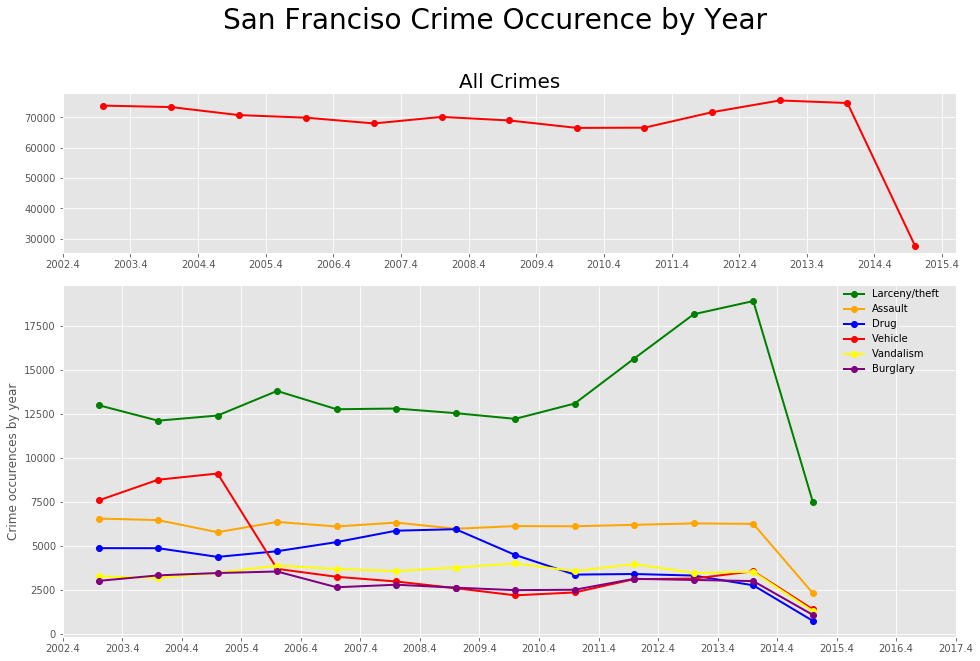

In [13]:
pylab.rcParams['figure.figsize'] = (16.0, 10.0)

years = data.groupby('Year').size().keys()
occursbyyear = data.groupby('Year').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(years, occursbyyear, 'ro-', linewidth=2)

ax1.set_title ('All Crimes', fontsize=20)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1))
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Linear normalized plot for 6 top crimes
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

y = np.empty([6,13])
y[0] = larceny.groupby('Year').size().get_values()
y[1] = assault.groupby('Year').size().get_values()
y[2] = drug.groupby('Year').size().get_values()
y[3] = vehicle.groupby('Year').size().get_values()
y[4] = vandalism.groupby('Year').size().get_values()
y[5] = burglary.groupby('Year').size().get_values()

color_sequence = ['green', 'orange', 'blue','red', 'yellow', 'purple']


for i in range(0,6):
    h[i] = ax2.plot(years, y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by year")

start, end = ax2.get_xlim()  
ax2.xaxis.set_ticks(np.arange(start, end+2, 1))

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(0.87, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'San Franciso Crime Occurence by Year',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)
plt.show()


crime occurance by year,month 

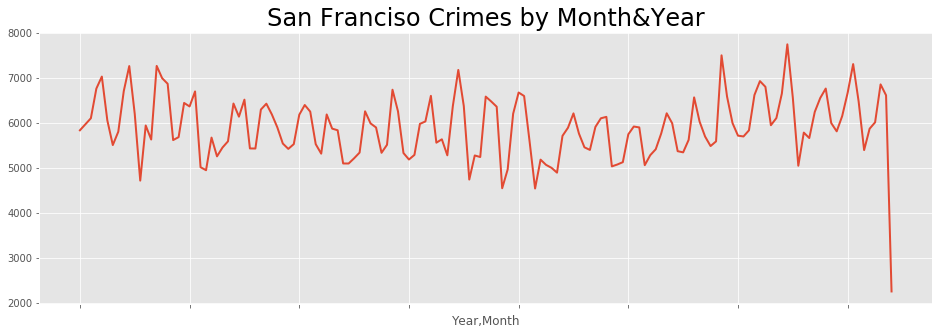

In [14]:
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearmonth = data.groupby(['Year','Month']).size()
ax = yearmonth.plot(lw=2)
plt.title('San Franciso Crimes by Month&Year', fontsize=24)
plt.show()

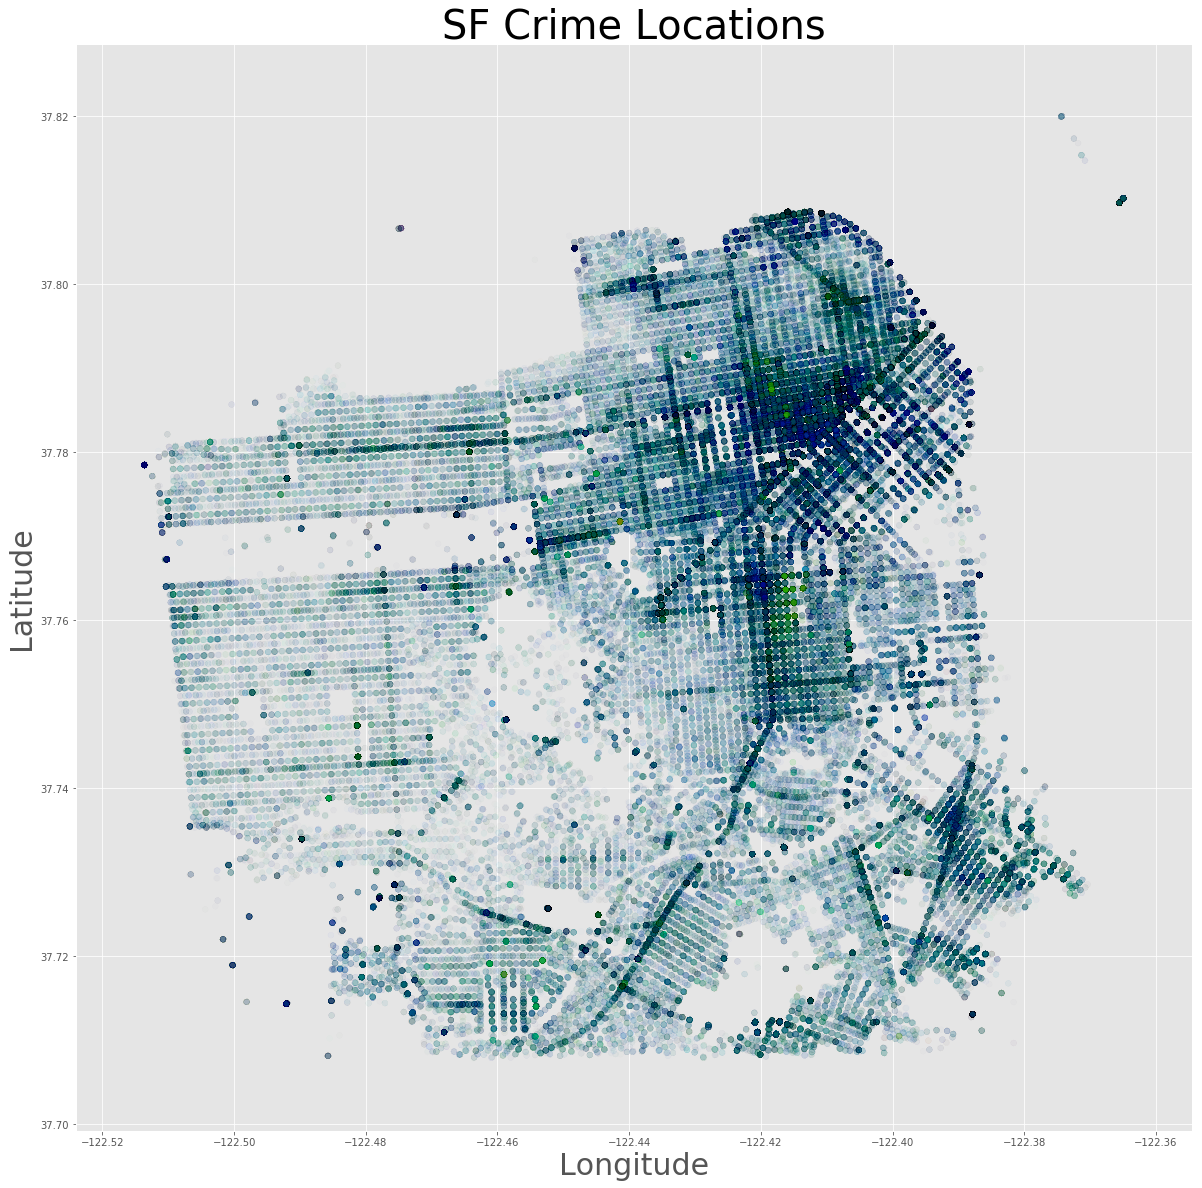

In [15]:
crime_categories = data['Category'].value_counts()
crime_category_names = crime_categories.index
# Let's drop the outlier for now, since it is skewing our visualization
data.drop(data[data['Y'] == data['Y'].max()].index, inplace=True)

# Assign a color index to each crime category
color_map = dict(zip(crime_category_names, range(len(crime_categories))))

# Draw a scatter plot to show the crimes distribution
fig = plt.figure(figsize=(20,20))
plt.scatter(data.X, data.Y, c=data.Category.map(color_map), cmap=plt.cm.gist_ncar, alpha = 0.01)
plt.title("SF Crime Locations", fontsize=40)
plt.xlabel('Longitude', fontsize=30)
plt.ylabel('Latitude', fontsize=30)

plt.show()

In [3]:
import numpy as np 
import pandas as pd 

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Metrics 
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

# Model Selection & Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
#from skopt import BayesSearchCV
#from skopt.space  import Real, Categorical, Integer


# Clustering
from sklearn.cluster import KMeans

# Mathematical Functions
import math

In [4]:
train = pd.read_csv('train.csv',parse_dates=['Dates'])
test = pd.read_csv('test.csv',parse_dates=['Dates'])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [6]:
train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [7]:
train.columns.values

array(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'], dtype=object)

In [8]:
train['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [9]:
train['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [10]:
train['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [11]:
train['Resolution'].value_counts()

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64

In [12]:
train[['X','Y']].describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


There seems to be an invalid coordinates (max) 90 (latitude) or -120.5 (longitude) does not seem to be a valid coordinate in San Francisco. We must fix these values for this feature.

In [13]:
train[train['Y']==train['Y'].max()]
train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


we use data imputation

In [14]:
train['Y'].replace(to_replace= train['Y'].max() ,value=np.nan, inplace=True)
train['X'].replace(to_replace= train['X'].max() ,value=np.nan, inplace=True)
test['Y'].replace(to_replace= test['Y'].max() ,value=np.nan, inplace=True)
test['X'].replace(to_replace= test['X'].max() ,value=np.nan, inplace=True)

In [15]:
train.isnull().sum()

Dates          0
Category       0
Descript       0
DayOfWeek      0
PdDistrict     0
Resolution     0
Address        0
X             67
Y             67
dtype: int64

In [16]:
test.isnull().sum()

Id             0
Dates          0
DayOfWeek      0
PdDistrict     0
Address        0
X             76
Y             76
dtype: int64

In [17]:
data=[train,test]

for dataset in data:
    mean_X = dataset["X"].mean()
    std_X = dataset["X"].std()
    mean_Y = dataset["Y"].mean()
    std_Y = dataset["Y"].std()
    max_X = mean_X + std_X
    min_X = mean_X - std_X
    max_Y = mean_Y + std_Y
    min_Y = mean_Y - std_Y
    
    is_null=dataset['Y'].isnull().sum()
    
    random_X = (max_X - min_X) * np.random.randn(is_null) + min_X
    random_Y = (max_Y - min_Y) * np.random.randn(is_null) + min_Y
    
    X_slice = dataset['X'].copy()
    Y_slice = dataset['Y'].copy()
    X_slice[np.isnan(X_slice)] = random_X
    Y_slice[np.isnan(Y_slice)] = random_Y
    dataset['X'] = X_slice
    dataset['Y'] = Y_slice

In [18]:
train[['X','Y']].describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422765,37.767033
std,0.025287,0.024169
min,-122.551853,37.629649
25%,-122.432952,37.752427
50%,-122.416422,37.775421
75%,-122.406959,37.784368
max,-122.364937,37.881029


Feature enginearing

adding minute, hour, day, month, year colomn

In [19]:
train['Minute']=train['Dates'].dt.minute
train['Hour'] = train['Dates'].dt.hour
train['Day'] = train['Dates'].dt.day
train['Month'] = train['Dates'].dt.month
train['Year'] = train['Dates'].dt.year

test['Minute']=test['Dates'].dt.minute
test['Hour'] = test['Dates'].dt.hour
test['Day'] = test['Dates'].dt.day
test['Month'] = test['Dates'].dt.month
test['Year'] = test['Dates'].dt.year
train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,Hour,Day,Month,Year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,23,13,5,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,30,23,13,5,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,30,23,13,5,2015


In [20]:
# Hour Zone 0 - Pass midnight, 1 - morning, 2 - afternoon, 3 - dinner / sun set, 4 - night

def get_hour_zone(hour):
    if hour >= 2 and hour < 8: 
        return 0
    elif hour >= 8 and hour < 12: 
        return 1
    elif hour >= 12 and hour < 18: 
        return 2
    elif hour >= 18 and hour < 22: 
        return 3
    elif hour < 2 or hour >= 22: 
        return 4

train["Hour_Zone"] = train["Hour"].map(get_hour_zone)
test["Hour_Zone"] = test["Hour"].map(get_hour_zone)

In [22]:
# Add Week of Year
train["WeekOfYear"] = train["Dates"].map(lambda x: int(x.weekofyear / 2) - 1)
test["WeekOfYear"] = test["Dates"].map(lambda x: int(x.weekofyear / 2))

print(sorted(train['WeekOfYear'].unique()))
print(sorted(test['WeekOfYear'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [23]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,Hour,Day,Month,Year,Hour_Zone,WeekOfYear
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,23,13,5,2015,4,9
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,30,23,13,5,2015,4,9
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,30,23,13,5,2015,4,9


adding holiday

In [24]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# Training set
cal = calendar()
holidays = cal.holidays(start=train['Dates'].min(), end=train['Dates'].max())
train['Holiday'] = train['Dates'].dt.date.astype('datetime64').isin(holidays)

In [25]:
# Test set
cal = calendar()
holidays = cal.holidays(start=test['Dates'].min(), end=test['Dates'].max())
test['Holiday'] = test['Dates'].dt.date.astype('datetime64').isin(holidays)

In [26]:
len(train[train['Holiday'] == True])

25653

In [27]:
len(test[test['Holiday'] == True])

18316

In [28]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,Hour,Day,Month,Year,Hour_Zone,WeekOfYear,Holiday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9,False
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9,False
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,23,13,5,2015,4,9,False
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,30,23,13,5,2015,4,9,False
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,30,23,13,5,2015,4,9,False


In [29]:
from datetime import datetime, time

def time_in_range(start, end, x):
    """Return true if x is in the inclusive range [start, end]"""
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end

def map_business_hours(date):
    
    # Convert military time to AM & PM
    time_parsed = date.time()
    business_start = time(8, 0, 0)
    business_end = time(18, 0, 0)
    
    if time_in_range(business_start, business_end, time_parsed):
        return 1
    else:
        return 0
    
train['BusinessHour'] = train['Dates'].map(map_business_hours).astype('uint8')
test['BusinessHour'] = test['Dates'].map(map_business_hours).astype('uint8')

In [30]:
train['BusinessHour'].value_counts()

1    455215
0    422834
Name: BusinessHour, dtype: int64

In [31]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,Hour,Day,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9,False,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9,False,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,23,13,5,2015,4,9,False,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,30,23,13,5,2015,4,9,False,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,30,23,13,5,2015,4,9,False,0


Season
The season feature may affect what type of crimes are commited.

1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall

In [32]:
train['Season']=(train['Month']%12 + 3)//3
test['Season']=(test['Month']%12 + 3)//3

In [33]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,Hour,Day,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour,Season
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9,False,0,2
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9,False,0,2
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,23,13,5,2015,4,9,False,0,2
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,30,23,13,5,2015,4,9,False,0,2
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,30,23,13,5,2015,4,9,False,0,2


In [34]:
# Weekend Feature

# Weekday = 0, Weekend = 1
days = {'Monday':0 ,'Tuesday':0 ,'Wednesday':0 ,'Thursday':0 ,'Friday':0, 'Saturday':1 ,'Sunday':1}

train['Weekend'] = train['DayOfWeek'].replace(days).astype('uint8')
test['Weekend'] = test['DayOfWeek'].replace(days).astype('uint8')

street type feature

In [35]:
train['Address'].value_counts().index

Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '900 Block of MARKET ST', '0 Block of TURK ST', '0 Block of 6TH ST',
       '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       '16TH ST / MISSION ST',
       ...
       'LOCKSLEY AV / 6TH AV', '700 Block of LAGUNA HONDA BL',
       '3500 Block of FOLSOM ST', 'ULLOA ST / 41ST AV',
       'BAYVIEW ST / FLORA ST', 'WAYLAND ST / BOWDOIN ST',
       '5TH ST / CYRIL MAGNIN STORTH ST', '0 Block of SAN ANDREAS WY',
       'MORAGA ST / 36TH AV', '2500 Block of LOWER GREAT HY'],
      dtype='object', length=23228)

In [36]:
import re

    
def find_streets(address):
    street_types = ['AV', 'ST', 'CT', 'PZ', 'LN', 'DR', 'PL', 'HY', 
                    'FY', 'WY', 'TR', 'RD', 'BL', 'WAY', 'CR', 'AL', 'I-80',  
                    'RW', 'WK','EL CAMINO DEL MAR']
    street_pattern = '|'.join(street_types)
    streets = re.findall(street_pattern, address)
    if len(streets) == 0:
        # Debug
#         print(address)
        return 'OTHER'
    elif len(streets) == 1:
        return streets[0]
    else:
#         print(address)
        return 'INT'

train['StreetType'] = train['Address'].map(find_streets)
test['StreetType'] = test['Address'].map(find_streets)


In [37]:
train['StreetType'].value_counts()

INT                  389995
ST                   358797
AV                    92467
BL                    13074
DR                     8200
WY                     4063
RD                     2384
PZ                     2347
CT                     2059
LN                     1356
PL                      863
HY                      819
TR                      766
I-80                    322
CR                      291
AL                      150
WAY                      55
EL CAMINO DEL MAR        21
OTHER                    14
WK                        5
RW                        1
Name: StreetType, dtype: int64

In [38]:
train['StreetType'].isnull().sum()

0

In [39]:
train.head(8)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,...,Day,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour,Season,Weekend,StreetType
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,...,13,5,2015,4,9,False,0,2,0,INT
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,...,13,5,2015,4,9,False,0,2,0,INT
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,...,13,5,2015,4,9,False,0,2,0,INT
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,30,...,13,5,2015,4,9,False,0,2,0,INT
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,30,...,13,5,2015,4,9,False,0,2,0,ST
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,30,...,13,5,2015,4,9,False,0,2,0,AV
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,30,...,13,5,2015,4,9,False,0,2,0,INT
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,30,...,13,5,2015,4,9,False,0,2,0,INT


Block number features

In [40]:
def find_block_number(address):
    block_num_pattern = '[0-9]+\s[Block]'
    block_num = re.search(block_num_pattern, address)
    if block_num:
#         print(address)
        num_pattern = '[0-9]+'
        block_no_pos = re.search(num_pattern, address)
        # Get integer of found regular expression
        block_no = int(block_no_pos.group())
        # Convert block number by dividing by 100 and adding 1 (0 = addresses with no block)
        block_map = (block_no // 100) + 1
#         print(block_map)
        return block_map
    else:
#         print(address)
        # 
        return 0


train['BlockNo'] = train['Address'].map(find_block_number)
test['BlockNo'] = test['Address'].map(find_block_number)

In [41]:
train['BlockNo'].value_counts()

0     260818
1      76325
2      51917
9      51718
3      38407
       ...  
82         7
79         5
81         4
84         4
80         3
Name: BlockNo, Length: 85, dtype: int64

X.Y coordinates

In [42]:
# Normalize X and Y
print('There are %d unique longitude values, %d unique latitude values' % (train['X'].nunique(), 
                                                                           train['Y'].nunique()))

xy_scaler = StandardScaler().fit(train[['X', 'Y']])
train[['X', 'Y']] = xy_scaler.transform(train[['X', 'Y']])
test[['X', 'Y']] = xy_scaler.transform(test[['X', 'Y']])

There are 34309 unique longitude values, 34309 unique latitude values


In [43]:
cos_30 = math.cos(math.radians(30))
sin_30 = math.sin(math.radians(30))
cos_45 = math.cos(math.radians(45))
sin_45 = math.sin(math.radians(45))
cos_60 = math.cos(math.radians(60))
sin_60 = math.sin(math.radians(60))


train["Rot30_X"] = train['X'] * cos_30 - train['Y'] * sin_30 
train["Rot30_Y"] = train['X'] * sin_30 + train['Y'] * cos_30
train["Rot45_X"] = train['X'] * cos_45 - train['Y'] * sin_45  
train["Rot45_Y"] = train['X'] * sin_45 + train['Y'] * cos_45
train["Rot60_X"] = train['X'] * cos_60 - train['Y'] * sin_60  
train["Rot60_Y"] = train['X'] * sin_60 + train['Y'] * cos_60
train["Radius"] = np.sqrt(train['X'] ** 2 + train['Y'] ** 2)
train["Angle"] = np.arctan2(train['X'], train['Y'])

test["Rot30_X"] = test['X'] * cos_30 - test['Y'] * sin_30  
test["Rot30_Y"] = test['X'] * sin_30 + test['Y'] * cos_30
test["Rot45_X"] = test['X'] * cos_45 - test['Y'] * sin_45  
test["Rot45_Y"] = test['X'] * sin_45 + test['Y'] * cos_45
test["Rot60_X"] = test['X'] * cos_60 - test['Y'] * sin_60  
test["Rot60_Y"] = test['X'] * sin_60 + test['Y'] * cos_60
test["Radius"] = np.sqrt(test['X'] ** 2 + test['Y'] ** 2)
test["Angle"] = np.arctan2(test['X'], test['Y'])

In [44]:
import xgboost

In [45]:
train.describe()

,X,Y,Minute,Hour,Day,Month,Year,Hour_Zone,WeekOfYear,BusinessHour,...,Weekend,BlockNo,Rot30_X,Rot30_Y,Rot45_X,Rot45_Y,Rot60_X,Rot60_Y,Radius,Angle
count,8.780490e+05,8.780490e+05,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,...,878049.000000,878049.000000,8.780490e+05,8.780490e+05,8.780490e+05,8.780490e+05,8.780490e+05,8.780490e+05,878049.000000,878049.000000
mean,4.129756e-13,1.481523e-13,20.155026,13.412655,15.570623,6.436509,2008.712046,2.212740,12.185458,0.518439,...,0.277339,7.743576,2.907102e-13,3.243033e-13,1.823404e-13,3.933207e-13,9.015806e-14,4.332711e-13,1.219272,0.278871
std,1.000001e+00,1.000001e+00,18.594915,6.549573,8.783005,3.428972,3.631194,1.214321,7.482940,0.499660,...,0.447685,10.233725,9.308345e-01,1.064683e+00,9.196699e-01,1.074341e+00,9.308345e-01,1.064683e+00,0.716504,1.652411
min,-5.104922e+00,-5.684403e+00,0.000000,0.000000,1.000000,1.000000,2003.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-5.433166e+00,-5.496079e+00,-5.041155e+00,-5.630620e+00,-4.468074e+00,-5.398021e+00,0.020055,-3.141548
25%,-4.028440e-01,-6.043135e-01,0.000000,9.000000,8.000000,3.000000,2006.000000,1.000000,6.000000,0.000000,...,0.000000,0.000000,-4.145826e-01,-5.663916e-01,-4.910760e-01,-5.401995e-01,-5.844297e-01,-4.588831e-01,0.742428,-1.065778
50%,2.508443e-01,3.470626e-01,19.000000,14.000000,16.000000,6.000000,2009.000000,2.000000,12.000000,1.000000,...,0.000000,4.000000,6.286778e-02,2.143338e-01,-9.701942e-02,2.239874e-01,-2.373007e-01,3.123799e-01,1.003679,0.508776
75%,6.250693e-01,7.172551e-01,33.000000,19.000000,23.000000,9.000000,2012.000000,3.000000,19.000000,1.000000,...,1.000000,11.000000,4.804563e-01,8.071440e-01,4.085429e-01,7.867785e-01,5.062857e-01,7.512171e-01,1.639685,1.172401
max,2.286833e+00,4.716720e+00,59.000000,23.000000,31.000000,12.000000,2015.000000,4.000000,25.000000,1.000000,...,1.000000,84.000000,3.086801e+00,3.701524e+00,3.616461e+00,2.904891e+00,4.480994e+00,2.873596e+00,5.752682,3.141186


In [46]:
# run KMeans separately on both the training set and test set
data = [train, test]
num_clusters = 40
for dataset in data:
    coordinates = dataset.loc[:,['Y','X']]
    kmeans = KMeans(n_clusters=num_clusters, n_jobs=3, random_state=1).fit(coordinates)
    id_labels=kmeans.labels_
#     print(kmeans.cluster_centers_)
    dataset['Cluster'] = id_labels

C:\Users\JeZoS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\JeZoS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [47]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,...,BlockNo,Rot30_X,Rot30_Y,Rot45_X,Rot45_Y,Rot60_X,Rot60_Y,Radius,Angle,Cluster
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123653,0.313047,53,...,0,-0.263610,0.209280,-0.308794,0.133921,-0.332933,0.049436,0.336584,-0.376189,36
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123653,0.313047,53,...,0,-0.263610,0.209280,-0.308794,0.133921,-0.332933,0.049436,0.336584,-0.376189,36
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-0.063202,1.381203,33,...,0,-0.745336,1.164556,-1.021348,0.931968,-1.227758,0.635867,1.382648,-0.045726,14
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-0.167298,1.400166,30,...,16,-0.844968,1.128930,-1.108365,0.871769,-1.296229,0.555198,1.410125,-0.118921,14
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-0.631658,0.186542,30,...,2,-0.640303,-0.154278,-0.578555,-0.314744,-0.477379,-0.453761,0.658627,-1.283637,25


Drop feature

In [48]:
train.drop(['Address'], axis=1, inplace=True)
test.drop(['Address'], axis=1, inplace=True)

In [49]:
train.drop(['Dates'], axis=1, inplace=True)
test.drop(['Dates'], axis=1, inplace=True)

In [50]:
train.drop(['Resolution'], axis=1, inplace=True)

In [51]:
train.drop(['Descript'], axis=1, inplace=True)

In [53]:
train.head()

,Category,DayOfWeek,PdDistrict,X,Y,Minute,Hour,Day,Month,Year,...,BlockNo,Rot30_X,Rot30_Y,Rot45_X,Rot45_Y,Rot60_X,Rot60_Y,Radius,Angle,Cluster
0,WARRANTS,Wednesday,NORTHERN,-0.123653,0.313047,53,23,13,5,2015,...,0,-0.263610,0.209280,-0.308794,0.133921,-0.332933,0.049436,0.336584,-0.376189,36
1,OTHER OFFENSES,Wednesday,NORTHERN,-0.123653,0.313047,53,23,13,5,2015,...,0,-0.263610,0.209280,-0.308794,0.133921,-0.332933,0.049436,0.336584,-0.376189,36
2,OTHER OFFENSES,Wednesday,NORTHERN,-0.063202,1.381203,33,23,13,5,2015,...,0,-0.745336,1.164556,-1.021348,0.931968,-1.227758,0.635867,1.382648,-0.045726,14
3,LARCENY/THEFT,Wednesday,NORTHERN,-0.167298,1.400166,30,23,13,5,2015,...,16,-0.844968,1.128930,-1.108365,0.871769,-1.296229,0.555198,1.410125,-0.118921,14
4,LARCENY/THEFT,Wednesday,PARK,-0.631658,0.186542,30,23,13,5,2015,...,2,-0.640303,-0.154278,-0.578555,-0.314744,-0.477379,-0.453761,0.658627,-1.283637,25


feature encoding

In [54]:
pd_districts = {'SOUTHERN':0, 'MISSION':1, 'NORTHERN':2, 'CENTRAL':3, 'BAYVIEW':4, 'INGLESIDE':5, 
                'TENDERLOIN':6, 'TARAVAL':7, 'PARK':8, 'RICHMOND':9}

train['PdDistrict'].replace(pd_districts, inplace=True)
test['PdDistrict'].replace(pd_districts, inplace=True)

In [56]:
data = [train, test]

for dataset in data:
    year_le = LabelEncoder()
    year_le.fit(dataset['Year'].unique())
    print(list(year_le.classes_))

    dataset['Year']=year_le.transform(dataset['Year']) 

[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [57]:
train['Year'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0], dtype=int64)

In [58]:
dict(zip(year_le.classes_, year_le.transform(year_le.classes_)))

{2003: 0,
 2004: 1,
 2005: 2,
 2006: 3,
 2007: 4,
 2008: 5,
 2009: 6,
 2010: 7,
 2011: 8,
 2012: 9,
 2013: 10,
 2014: 11,
 2015: 12}

In [59]:
train.head()

,Category,DayOfWeek,PdDistrict,X,Y,Minute,Hour,Day,Month,Year,...,BlockNo,Rot30_X,Rot30_Y,Rot45_X,Rot45_Y,Rot60_X,Rot60_Y,Radius,Angle,Cluster
0,WARRANTS,Wednesday,2,-0.123653,0.313047,53,23,13,5,12,...,0,-0.263610,0.209280,-0.308794,0.133921,-0.332933,0.049436,0.336584,-0.376189,36
1,OTHER OFFENSES,Wednesday,2,-0.123653,0.313047,53,23,13,5,12,...,0,-0.263610,0.209280,-0.308794,0.133921,-0.332933,0.049436,0.336584,-0.376189,36
2,OTHER OFFENSES,Wednesday,2,-0.063202,1.381203,33,23,13,5,12,...,0,-0.745336,1.164556,-1.021348,0.931968,-1.227758,0.635867,1.382648,-0.045726,14
3,LARCENY/THEFT,Wednesday,2,-0.167298,1.400166,30,23,13,5,12,...,16,-0.844968,1.128930,-1.108365,0.871769,-1.296229,0.555198,1.410125,-0.118921,14
4,LARCENY/THEFT,Wednesday,8,-0.631658,0.186542,30,23,13,5,12,...,2,-0.640303,-0.154278,-0.578555,-0.314744,-0.477379,-0.453761,0.658627,-1.283637,25


In [61]:
data = [train, test]

for dataset in data:
    dow_le = LabelEncoder()
    dow_le.fit(dataset['DayOfWeek'].unique())
    print(list(dow_le.classes_))
    dataset['DayOfWeek']=dow_le.transform(dataset['DayOfWeek'])

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']


In [62]:
train['DayOfWeek'].unique()

array([6, 5, 1, 3, 2, 0, 4])

In [63]:
dict(zip(dow_le.classes_, dow_le.transform(dow_le.classes_)))

{'Friday': 0,
 'Monday': 1,
 'Saturday': 2,
 'Sunday': 3,
 'Thursday': 4,
 'Tuesday': 5,
 'Wednesday': 6}

In [64]:
data = [train, test]

for dataset in data:
    st_le = LabelEncoder()
    st_le.fit(dataset['StreetType'].unique())
    print(list(st_le.classes_))
    dataset['StreetType']=st_le.transform(dataset['StreetType'])

['AL', 'AV', 'BL', 'CR', 'CT', 'DR', 'EL CAMINO DEL MAR', 'HY', 'I-80', 'INT', 'LN', 'OTHER', 'PL', 'PZ', 'RD', 'RW', 'ST', 'TR', 'WAY', 'WK', 'WY']
['AL', 'AV', 'BL', 'CR', 'CT', 'DR', 'EL CAMINO DEL MAR', 'HY', 'I-80', 'INT', 'LN', 'OTHER', 'PL', 'PZ', 'RD', 'RW', 'ST', 'TR', 'WAY', 'WK', 'WY']


In [65]:
train['StreetType'].unique()

array([ 9, 16,  1, 20,  4,  5, 17,  7, 14, 13,  2, 12, 10, 18,  3,  0, 11,
       19, 15,  6,  8])

In [66]:
train.head()

,Category,DayOfWeek,PdDistrict,X,Y,Minute,Hour,Day,Month,Year,...,BlockNo,Rot30_X,Rot30_Y,Rot45_X,Rot45_Y,Rot60_X,Rot60_Y,Radius,Angle,Cluster
0,WARRANTS,6,2,-0.123653,0.313047,53,23,13,5,12,...,0,-0.263610,0.209280,-0.308794,0.133921,-0.332933,0.049436,0.336584,-0.376189,36
1,OTHER OFFENSES,6,2,-0.123653,0.313047,53,23,13,5,12,...,0,-0.263610,0.209280,-0.308794,0.133921,-0.332933,0.049436,0.336584,-0.376189,36
2,OTHER OFFENSES,6,2,-0.063202,1.381203,33,23,13,5,12,...,0,-0.745336,1.164556,-1.021348,0.931968,-1.227758,0.635867,1.382648,-0.045726,14
3,LARCENY/THEFT,6,2,-0.167298,1.400166,30,23,13,5,12,...,16,-0.844968,1.128930,-1.108365,0.871769,-1.296229,0.555198,1.410125,-0.118921,14
4,LARCENY/THEFT,6,8,-0.631658,0.186542,30,23,13,5,12,...,2,-0.640303,-0.154278,-0.578555,-0.314744,-0.477379,-0.453761,0.658627,-1.283637,25


In [68]:
train['Holiday'].replace(False, 0, inplace=True)
train['Holiday'].replace(True, 1, inplace=True)
test['Holiday'].replace(False, 0, inplace=True)
test['Holiday'].replace(True, 1, inplace=True)

train['Holiday'] = train['Holiday'].astype('uint8')
train['Holiday'] = train['Holiday'].astype('uint8')

In [69]:
train[train['Holiday'] == 1].head()

,Category,DayOfWeek,PdDistrict,X,Y,Minute,Hour,Day,Month,Year,...,BlockNo,Rot30_X,Rot30_Y,Rot45_X,Rot45_Y,Rot60_X,Rot60_Y,Radius,Angle,Cluster
18357,DRUG/NARCOTIC,1,0,0.765610,0.347063,48,23,16,2,12,...,9,0.489507,0.683370,0.295958,0.786778,0.082240,0.836569,0.840602,1.145189,24
18358,OTHER OFFENSES,1,0,0.765610,0.347063,48,23,16,2,12,...,9,0.489507,0.683370,0.295958,0.786778,0.082240,0.836569,0.840602,1.145189,24
18359,NON-CRIMINAL,1,5,0.436383,-2.363445,30,23,16,2,12,...,3,1.559642,-1.828612,1.979778,-1.362638,2.264995,-0.803803,2.403394,2.959010,3
18360,VANDALISM,1,3,0.281646,1.685242,30,23,16,2,12,...,28,-0.598708,1.600286,-0.992492,1.390800,-1.318639,1.086534,1.708615,0.165595,35
18361,LARCENY/THEFT,1,2,-0.250926,0.118589,30,23,16,2,12,...,1,-0.276603,-0.022762,-0.261286,-0.093577,-0.228164,-0.158014,0.277538,-1.129305,36


In [70]:
test[test['Holiday'] == 1].head()

,Id,DayOfWeek,PdDistrict,X,Y,Minute,Hour,Day,Month,Year,...,BlockNo,Rot30_X,Rot30_Y,Rot45_X,Rot45_Y,Rot60_X,Rot60_Y,Radius,Angle,Cluster
27957,27957,4,3,0.499767,1.575016,55,23,1,1,12,...,0,-0.354697,1.613887,-0.760316,1.467093,-1.114120,1.220319,1.652405,0.307260,34
27958,27958,4,6,0.192227,0.750331,43,23,1,1,12,...,0,-0.208692,0.745919,-0.394639,0.666489,-0.553692,0.541639,0.774563,0.250796,12
27959,27959,4,1,-0.121695,-0.265251,30,23,1,1,12,...,6,0.027234,-0.290562,0.101509,-0.273612,0.168866,-0.238017,0.291835,-2.711450,11
27960,27960,4,7,-2.341170,-1.309888,15,23,1,1,12,...,1,-1.372569,-2.304981,-0.729227,-2.581688,-0.036189,-2.682456,2.682700,-2.080905,20
27961,27961,4,7,-2.341170,-1.309888,15,23,1,1,12,...,1,-1.372569,-2.304981,-0.729227,-2.581688,-0.036189,-2.682456,2.682700,-2.080905,20


In [71]:
data = [train]

for dataset in data:
    cat_le = LabelEncoder()
    cat_le.fit(dataset['Category'].unique())
    print(list(cat_le.classes_))
    dataset['Category']=cat_le.transform(dataset['Category'])

['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']


In [72]:
len(train['Category'].unique())

39

In [73]:
dict(zip(cat_le.classes_, cat_le.transform(cat_le.classes_)))

{'ARSON': 0,
 'ASSAULT': 1,
 'BAD CHECKS': 2,
 'BRIBERY': 3,
 'BURGLARY': 4,
 'DISORDERLY CONDUCT': 5,
 'DRIVING UNDER THE INFLUENCE': 6,
 'DRUG/NARCOTIC': 7,
 'DRUNKENNESS': 8,
 'EMBEZZLEMENT': 9,
 'EXTORTION': 10,
 'FAMILY OFFENSES': 11,
 'FORGERY/COUNTERFEITING': 12,
 'FRAUD': 13,
 'GAMBLING': 14,
 'KIDNAPPING': 15,
 'LARCENY/THEFT': 16,
 'LIQUOR LAWS': 17,
 'LOITERING': 18,
 'MISSING PERSON': 19,
 'NON-CRIMINAL': 20,
 'OTHER OFFENSES': 21,
 'PORNOGRAPHY/OBSCENE MAT': 22,
 'PROSTITUTION': 23,
 'RECOVERED VEHICLE': 24,
 'ROBBERY': 25,
 'RUNAWAY': 26,
 'SECONDARY CODES': 27,
 'SEX OFFENSES FORCIBLE': 28,
 'SEX OFFENSES NON FORCIBLE': 29,
 'STOLEN PROPERTY': 30,
 'SUICIDE': 31,
 'SUSPICIOUS OCC': 32,
 'TREA': 33,
 'TRESPASS': 34,
 'VANDALISM': 35,
 'VEHICLE THEFT': 36,
 'WARRANTS': 37,
 'WEAPON LAWS': 38}

memory usage

In [76]:
columns_to_convert = ['DayOfWeek', 'PdDistrict', 'Minute', 'Hour', 'Day', 'Month', 'Year', 
                      'Hour_Zone', 'WeekOfYear', 'Season', 'StreetType', 'BlockNo', 'Cluster']
train[columns_to_convert] = train[columns_to_convert].astype('int16')
test[columns_to_convert] = test[columns_to_convert].astype('int16')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Category      878049 non-null  int32  
 1   DayOfWeek     878049 non-null  int16  
 2   PdDistrict    878049 non-null  int16  
 3   X             878049 non-null  float64
 4   Y             878049 non-null  float64
 5   Minute        878049 non-null  int16  
 6   Hour          878049 non-null  int16  
 7   Day           878049 non-null  int16  
 8   Month         878049 non-null  int16  
 9   Year          878049 non-null  int16  
 10  Hour_Zone     878049 non-null  int16  
 11  WeekOfYear    878049 non-null  int16  
 12  Holiday       878049 non-null  uint8  
 13  BusinessHour  878049 non-null  uint8  
 14  Season        878049 non-null  int16  
 15  Weekend       878049 non-null  uint8  
 16  StreetType    878049 non-null  int16  
 17  BlockNo       878049 non-null  int16  
 18  Rot3

Building machine learning model

In [77]:
# Set training data (drop labels) and training labels
X_train = train.drop("Category", axis=1).copy()
Y_train = train["Category"].copy()

# Set testing data (drop Id)
X_test = test.drop("Id", axis=1).copy()

In [78]:
def one_hot_encode(train_data):
    '''One Hot Encode the categorical features'''
    encoded_train_data = train_data

    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['PdDistrict']), prefix='PdDistrict')], axis=1)
    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['DayOfWeek']), prefix='DayOfWeek')], axis=1)
    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['StreetType']), prefix='StreetType')], axis=1)
    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['Season']), prefix='Season')], axis=1)
    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['Hour_Zone']), prefix='Hour_Zone')], axis=1)
    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['Cluster']), prefix='Cluster')], axis=1)
    encoded_train_data = encoded_train_data.drop(['Cluster','StreetType', 'Season', 'Hour_Zone', 'DayOfWeek', 'PdDistrict'], axis=1)

    return encoded_train_data

In [81]:
X_encoded_train = one_hot_encode(X_train)
X_train

,DayOfWeek,PdDistrict,X,Y,Minute,Hour,Day,Month,Year,Hour_Zone,...,BlockNo,Rot30_X,Rot30_Y,Rot45_X,Rot45_Y,Rot60_X,Rot60_Y,Radius,Angle,Cluster
0,6,2,-0.123653,0.313047,53,23,13,5,12,4,...,0,-0.263610,0.209280,-0.308794,0.133921,-0.332933,0.049436,0.336584,-0.376189,36
1,6,2,-0.123653,0.313047,53,23,13,5,12,4,...,0,-0.263610,0.209280,-0.308794,0.133921,-0.332933,0.049436,0.336584,-0.376189,36
2,6,2,-0.063202,1.381203,33,23,13,5,12,4,...,0,-0.745336,1.164556,-1.021348,0.931968,-1.227758,0.635867,1.382648,-0.045726,14
3,6,2,-0.167298,1.400166,30,23,13,5,12,4,...,16,-0.844968,1.128930,-1.108365,0.871769,-1.296229,0.555198,1.410125,-0.118921,14
4,6,8,-0.631658,0.186542,30,23,13,5,12,4,...,2,-0.640303,-0.154278,-0.578555,-0.314744,-0.477379,-0.453761,0.658627,-1.283637,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,1,7,-1.434260,-2.191963,15,0,6,1,0,4,...,0,-0.146124,-2.615426,0.535777,-2.564127,1.181166,-2.338087,2.619505,-2.562182,6
878045,1,5,-0.972776,-1.451690,1,0,6,1,0,4,...,7,-0.116604,-1.743588,0.338643,-1.714356,0.770812,-1.568294,1.747483,-2.551218,17
878046,1,0,0.766181,0.547525,1,0,6,1,0,4,...,0,0.389769,0.857261,0.154613,0.928930,-0.091080,0.937294,0.941709,0.950328,24
878047,1,0,1.274700,0.561655,1,0,6,1,0,4,...,0,0.823095,1.123757,0.504199,1.298499,0.150942,1.384750,1.392952,1.155772,8


In [82]:
# Use these for ML algorithms that can't handle categorical data (Logistic Regression, Linear Models)
mini_encoded_train_data, mini_encoded_dev_data, mini_train_labels, mini_dev_labels = train_test_split(X_encoded_train, 
                                                                                      Y_train,
                                                                                      stratify=Y_train,
                                                                                      test_size=0.5,
                                                                                      random_state=1)

In [83]:
# Use these for ML algorithms that can handle categorical data without OHE
mini_train_data, mini_dev_data, mini_train_labels, mini_dev_labels = train_test_split(X_train, 
                                                                                      Y_train,
                                                                                      stratify=Y_train,
                                                                                      test_size=0.5,
                                                                                      random_state=1)

In [84]:
# K Neighbors
knn = KNeighborsClassifier()
knn.fit(mini_train_data, mini_train_labels)
pred_probs = knn.predict_proba(mini_dev_data)
knn_loss = log_loss(mini_dev_labels, pred_probs)


print('KNN Validation Log Loss: ', knn_loss)

KNN Validation Log Loss:  17.924567154177236


In [85]:
# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(mini_train_data, mini_train_labels)
pred_probs = gaussian.predict_proba(mini_dev_data)
nb_loss = log_loss(mini_dev_labels, pred_probs)


print('Gaussian Naive Bayes Validation Log Loss: ', nb_loss)

Gaussian Naive Bayes Validation Log Loss:  4.040518354619635


In [86]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(penalty='elasticnet', loss='log', 
                                  tol=0.0001, max_iter=1000, n_jobs=3, random_state=1)
sgd.fit(mini_encoded_train_data, mini_train_labels)
pred_probs = sgd.predict_proba(mini_encoded_dev_data)
# sgd.fit(one_hot_encode(mini_train_data), mini_train_labels)
# sgd = gaussian.predict_proba(one_hot_encode(mini_dev_data))
sgd_loss = log_loss(mini_dev_labels, pred_probs)

print('Linear Model SGD Validation Log Loss: ', sgd_loss)

Linear Model SGD Validation Log Loss:  2.5653853951983807


In [ ]:
# Logistic Regression
logreg = LogisticRegression(penalty='l1', C=1.5, solver='saga', multi_class='multinomial', 
                            tol=0.0001, max_iter=1000, verbose=3, n_jobs=3, random_state=1)

logreg.fit(mini_encoded_train_data, mini_train_labels)
pred_probs = logreg.predict_proba(mini_encoded_dev_data)

logreg_loss = log_loss(mini_dev_labels, pred_probs)


print('Logistic Regression Validation Log Loss: ', logreg_loss)

In [ ]:
# XGBoost Ensemble 
# xgb = XGBClassifier(n_estimators=100, verbose=3, n_jobs=2, random_state=1)
xgb = XGBClassifier(n_estimators=500, objective="multi:softprob", 
                    verbose=3, n_jobs=3, random_state=1)

xgb.fit(mini_encoded_train_data, mini_train_labels)
pred_probs = xgb.predict_proba(mini_encoded_dev_data)

xgb_loss = log_loss(mini_dev_labels, pred_probs)

print('XGBoost Validation Log Loss: ', xgb_loss)

In [ ]:
# Display the rank of the models
models = pd.DataFrame({
    'Model': ['SGD (Elastic net)', 'Logistic Regression (l1)', 
              'Gaussian Naive Bayes', 'XGBoost', 'K Neighbors'],
    'Log_Loss': [sgd_loss, logreg_loss, rf_loss, nb_loss, xgb_loss, knn_loss]})
print(models.sort_values(by='Log_Loss', ascending=True).reset_index(drop=True))